In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec

Daten aus den LaGuS-Berichten.

In [2]:
all_covid_lagus = {}
all_covid_lagus["LUP"] = np.array([123.2, 121.4, 122.3, 120.4, 116.9, 133.6, 136.9, 159.1, 188.4, 187.5, 186.5, 175.2, 163.9, 149.2, 164.3, 161.5, 162.9, 160.5, 159.1, 155.8, 163.9, 141.2, 142.1, 140.2, 139.3, 139.8, 129.9, 125.1,123.2, 111.4, 112.9, 112.9, 83.6, 96.8,94.9, 93.0, 89.7, 88.3, 87.8, 77.9, 58.6, 53.4,49.6,53.8,53.8, 54.8, 63.3, 67.1, 70.8, 75.6, 70.4, 70.4, 68.5, 66.1, 66.6, 66.6, 68.5, 78.9, 78.9, 79.3,89.2, 94.9, 95.4, 99.6,98.7, 98.2, 98.2, 88.3, 89.2, 92.1, 85.0, 79.8, 80.3, 80.7])
all_covid_lagus["MSE"] = np.array([173.2, 161.2, 156.2, 183.3, 177.5, 198.8, 220.9, 241.8, 256.6, 261.6, 235.6, 227.5, 206.5, 223.6, 201.9, 203.0, 194.1, 187.4, 191.0, 173.2, 154.6, 165.8, 167.8, 170.5, 150.9, 144.5, 147.6, 136.8, 135.6, 134.1, 129.0, 130.2, 115.9, 109.7, 104.6, 93.4, 86.4,85.2, 83.3, 70.9, 67.0, 60.4,61.2,62.4,57.0,51.5, 52.7, 48.0, 58.5, 65.6, 64.3, 63.2, 62.8, 60.4, 66.6, 55.4, 52.7, 52.3, 52.7, 52.7, 28.7, 38.0, 41.1, 37.6, 35.6, 35.6, 35.6, 41.5, 38.7, 36.8, 39.9, 39.5, 39.9, 41.1])
all_covid_lagus["NWM"] = np.array([52.1, 53.4, 52.8, 57.8, 58.5, 62.9, 76.9, 94.1, 111.2, 109.3, 108.1, 90.3, 93.4, 78.8, 73.7, 58.5, 58.5, 55.3, 54.7, 47.7, 48.9, 45.8,51.5,50.9, 52.8, 56.5, 68.0,64.2, 62.3, 66.1, 68.0,66.7, 64.8, 59.1, 59.8, 52.8, 43.9, 42.6, 41.3, 43.9, 40.0, 45.8, 50.2, 55.3, 56.6, 58.5, 60.4, 59.8,60.4, 72.5, 75.0, 76.9, 74.4, 79.5, 85.2,87.7,80.1, 82.0, 78.8, 80.7, 78.8, 89.0, 91.5,97.9, 105.5, 106.8, 104.9, 108.1,102.3, 104.2, 99.8, 96.0, 96.0, 96.0])
all_covid_lagus["LRO"] = np.array([35.7, 36.1, 39.9, 38.5, 48.2, 80.2, 85.7, 105.7, 115.4, 117.2, 112.1, 90.8, 82.5, 76.9, 63.5, 71.8, 69.5, 67.2, 61.6, 57.0, 59.3, 47.3, 56.1, 55.6, 51.9, 50.0, 49.6, 47.7, 42.2, 46.3, 46.8,43.1, 50.0, 52.8, 56.1, 51.0, 55.1, 52.8, 49.6, 45.9, 37.5, 36.1, 32.4, 36.1, 38.1, 32.9, 33.4, 36.1, 34.1, 37.0 ,41.2, 43.6, 39.9, 46.3, 64.9,71.8, 74.1, 82.5, 82.9, 80.6, 83.4,97.8, 96.4, 95.9, 100.1, 101.9, 93.1, 84.8, 68.1, 79.7, 70.0, 74.1, 70.4, 69.0])
all_covid_lagus["VG"] = np.array([117.6, 119.7, 126.9, 127.3, 123.1, 115.0, 110.3, 123.9, 104.0, 98.0, 107.4, 123.5, 132.8, 140.5, 153.2, 175.3, 200.3, 199.9, 199.0, 197.8, 195.2, 200.7, 196.9, 201.2, 191.0, 194.0, 199.5, 201.6, 198.6, 181.2, 164.7,163.0, 147.7, 163.4, 181.2, 194.0, 205.8, 211.4, 207.1, 208.4, 210.9, 196.1, 188.0, 188.0, 185.5, 179.9, 176.6, 171.9, 166.8, 163.4, 158.7, 158.3, 163.8, 149.0, 123.1, 121.8, 111.2, 117.6, 123.1, 127.3, 111.0, 112.5, 111.6, 101.9, 95.5, 95.5, 92.5, 83.6, 73.4, 80, 75.1, 84.9, 99.7, 103.1])
all_covid_lagus["VR"] = np.array([58.3, 54.7, 53.0, 51.6, 50.3, 55.6, 58.7, 72.5, 86.8, 87.2, 81.4, 73.4, 62.3, 81.4, 83.2, 80.1, 80.6, 78.8, 77.9, 67.9, 85.4, 61.4, 66.8, 66.3, 67.2,65.4, 67.2, 52.1, 56.5, 50.7, 52.1, 51.6, 50.7,44.9, 48.1, 42.3, 35.6, 40.5, 40.5,37.8, 31.2, 28.9, 27.6,29.8, 25.4, 26.3, 23.1, 21.4, 19.6,21.4, 20.9, 23.1, 21.4, 17.8, 16.0, 14.2, 13.8, 21.8, 22.3,20.5, 24.0, 26.3,27.6,25.4, 24.9, 25.4, 24.5, 20.4, 24.0, 26.3, 29.8, 39.6, 43.2, 42.7])
all_covid_lagus["HRO"] = np.array([30.6, 35.9, 38.7, 40.2, 40.6, 44.9, 45.9, 47.3, 43,52.1, 48.3, 45.4, 38.7, 34.4, 39.2, 41.6, 46.8, 45.4, 44.5, 49.2, 45.4, 41.5, 37.3, 33.3,41.1, 41.6, 34.9, 39.2, 47.3, 44.0, 43.0, 43.5, 43.0, 47.3, 43.0, 35.4, 35.9, 32.0, 30.6, 28.7, 23.9, 18.2, 17.2, 20.1, 21.0, 20.1, 20.1, 26.3, 25.8, 25.8,22.9, 26.3, 27.2, 24.9, 23.9, 26.8, 27.7, 29.6, 25.8, 25.8, 26.3, 25.3, 21.0, 21.5, 21.5, 24.4, 24.4, 26.3, 25.3, 24.9, 22.5, 22.9, 23.4, 22.0])
all_covid_lagus["SN"] = np.array([153.7, 149.5, 148.5, 153.7, 168.3, 108.7, 93.0, 118.1, 133.1,135.9, 131.7, 120.2, 141.1, 133.8, 118.1, 121.3, 118., 115, 112.9, 95.1, 95.1, 95.1, 85.7 ,83.6, 88.9, 100.4, 86.8, 78.4, 75.3, 80.5, 82.6, 82.6,78.4, 95.1, 102.5, 114.0, 109.8, 110.8, 110.8, 101.4, 87.8, 89.9, 85.7, 88.9, 87.8, 85.7, 85.7, 87.8, 86.8, 81.5, 84.7, 82.6, 82.6, 75.3, 80.5, 73.2, 65.9, 52.3, 59.6, 58.5, 70.0, 62.7, 65.9, 74.2, 74.2, 73.2, 76.3, 62.7, 61.7, 61.7, 65.9, 73.2, 72.1, 69.0])

Speichern der Daten.

In [3]:
with open('corona_mv.pickle', 'wb') as handle:
    pickle.dump(all_covid_lagus, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
with open('corona_mv.pickle', 'rb') as handle:
    lagus_data = pickle.load(handle)

Zeitraum der berücksichtigt wurde.

In [5]:
t = np.arange(datetime(2021,1,1),
              datetime(2021,3,16),
              timedelta(days=1)).astype(datetime)

Sort data ...

In [6]:
regions = {}
regions["HRO"] = ['SK Rostock', 208886]
regions["VG"] = ['LK Vorpommern-Greifswald', 235600]
regions["LRO"] = ["LK Rostock", 215794]
regions["SN"] = ["SK Schwerin", 95818]
regions["LUP"] = ["LK Ludwigslust-Parchim", 211779] 
regions["MSE"] = ["LK Mecklenburgische Seenplatte", 275406] 
regions["NWM"] = ["LK Nordwestmecklenburg", 155000]
regions["VR"] = ["LK Vorpommern-Rügen", 225888]

RKI Daten

In [7]:
# Downloaded RKI data
# for reproducing use (~roughly 200mb)
# url = "https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.csv"
# RKIData = pd.read_csv(url, index_col = 8)

RKIData = pd.read_csv('dd4580c810204019a7b8eb3e0b329dd6_0.csv', index_col = 8)

In [18]:
lagus.index = pd.to_datetime(lagus.index)

In [24]:
RKIData_sub.index = pd.to_datetime(RKIData_sub.index.strftime('%Y-%m-%d'))

In [26]:
RKIData_sub[lagus.index]

2021-01-01     7
2021-01-02     0
2021-01-03     6
2021-01-04    18
2021-01-05    37
              ..
2021-03-11    12
2021-03-12    28
2021-03-13    16
2021-03-14     1
2021-03-15     2
Name: AnzahlFall, Length: 74, dtype: int64

In [40]:
lagus

,0
2021-01-01,30.6
2021-01-02,35.9
2021-01-03,38.7
2021-01-04,40.2
2021-01-05,40.6
...,...
2021-03-11,24.9
2021-03-12,22.5
2021-03-13,22.9
2021-03-14,23.4


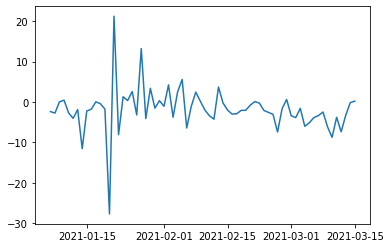

In [44]:
plt.plot(lagus.index, lagus.values.squeeze() - (RKIData_sub[lagus.index].rolling(7).sum()/rki_subset[1]*100000).values.squeeze())

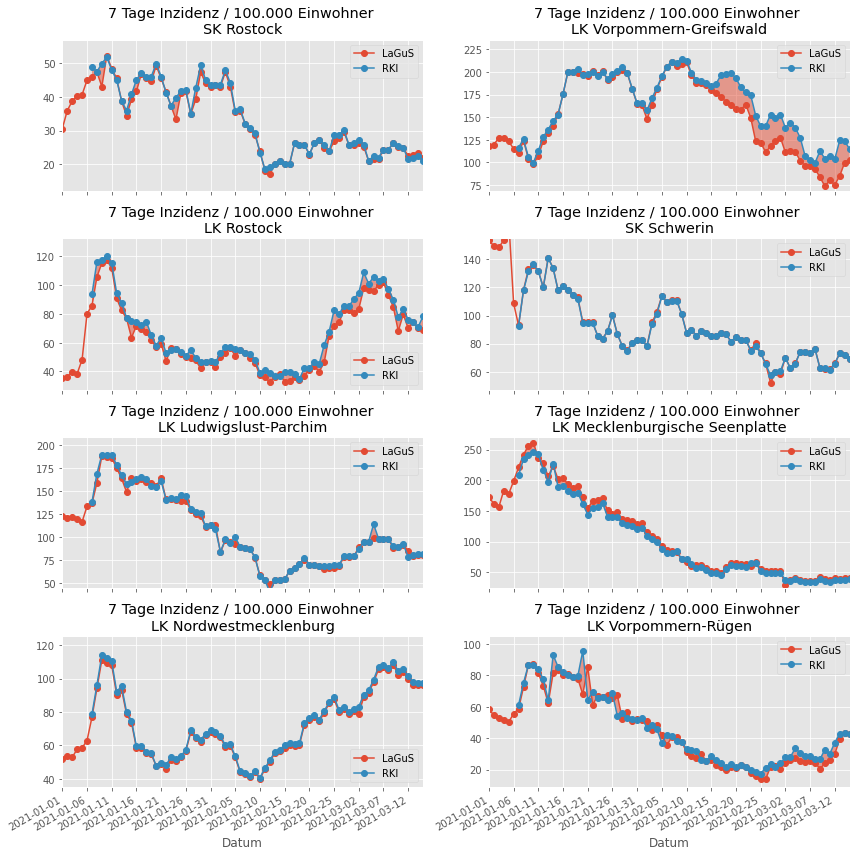

In [59]:
plt.style.use('ggplot')

f = plt.figure(figsize = (12,12))
gs = gridspec.GridSpec(4, 2, figure=f)

for count, (lagus_subset, rki_subset) in enumerate(regions.items()):
    ax = plt.subplot(gs[count])
    
    lagus = pd.DataFrame(lagus_data[lagus_subset], index = t)
    RKIData_sub = RKIData[RKIData.Landkreis==rki_subset[0]]
    RKIData_sub.index = pd.to_datetime(RKIData_sub.index)
    RKIData_sub.index = pd.to_datetime(RKIData_sub.index.strftime('%Y-%m-%d'))
    RKIData_sub = RKIData_sub.groupby(pd.Grouper(freq='D')).AnzahlFall.sum()
    RKIData_sub = RKIData_sub[lagus.index]
    
    ax.set_title('7 Tage Inzidenz / 100.000 Einwohner \n{}'.format(rki_subset[0]))
    ax.set_ylabel('')
    ax.set_xlabel('Datum')
    ax.plot(lagus.index, lagus.values, '-o', label='LaGuS')

    ax.plot(RKIData_sub.index,
             RKIData_sub.rolling(7).sum()/rki_subset[1]*100000,
             '-o', label='RKI')
    ax.fill_between(RKIData_sub.index,
                    RKIData_sub.rolling(7).sum()/rki_subset[1]*100000,
                    lagus.values.squeeze(),
                    alpha = 0.5)
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax.legend()
    f.autofmt_xdate()
    ax.set_xlim([date(2021, 1, 1), date(2021, 3, 15)])
    ax.set_ylim([lagus.values.min()-5, np.nanmax(RKIData_sub.rolling(7).sum()/rki_subset[1]*100000)*1.1])

f.tight_layout()
plt.savefig("mv_rki_lagus.png", dpi = 600)

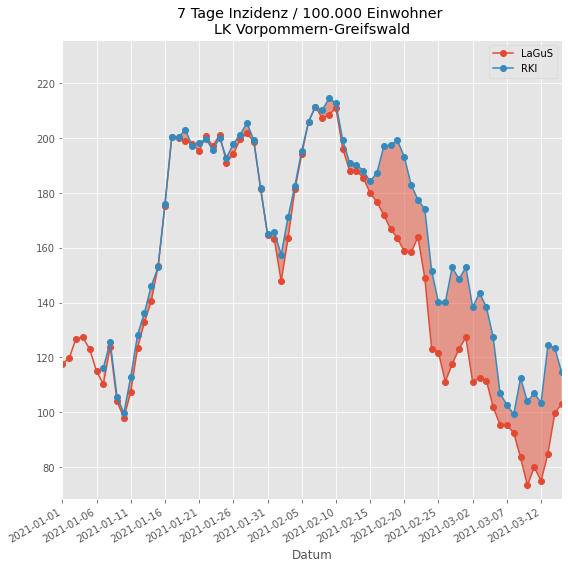

In [60]:
f = plt.figure(figsize = (8,8))
gs = gridspec.GridSpec(1, 1, figure=f)

ax = plt.subplot(gs[0])

lagus = pd.DataFrame(lagus_data["VG"], index = t)
RKIData_sub = RKIData[RKIData.Landkreis==regions["VG"][0]]
RKIData_sub.index = pd.to_datetime(RKIData_sub.index)
RKIData_sub.index = pd.to_datetime(RKIData_sub.index.strftime('%Y-%m-%d'))
RKIData_sub = RKIData_sub.groupby(pd.Grouper(freq='D')).AnzahlFall.sum()
RKIData_sub = RKIData_sub[lagus.index]

ax.set_title('7 Tage Inzidenz / 100.000 Einwohner \n{}'.format(regions["VG"][0]))
ax.set_ylabel('')
ax.set_xlabel('Datum')
ax.plot(lagus.index, lagus.values, '-o', label='LaGuS')
ax.plot(RKIData_sub.index,
         RKIData_sub.rolling(7).sum()/regions["VG"][1]*100000,
         '-o', label='RKI')
ax.fill_between(RKIData_sub.index,
                RKIData_sub.rolling(7).sum()/regions["VG"][1]*100000,
                lagus.values.squeeze(),
                alpha = 0.5)
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.legend()
f.autofmt_xdate()
ax.set_xlim([date(2021, 1, 1), date(2021, 3, 15)])
ax.set_ylim([lagus.values.min()-5, np.nanmax(RKIData_sub.rolling(7).sum()/regions["VG"][1]*100000)*1.1])

f.tight_layout()
plt.savefig("mv_rki_lagus_greifwald.png", dpi = 600)